 Nesta Analise foi possivel compreender o balanceamento dos dados, qual tecnica mais utilizada para analise em uma base com transações de fraudes e nao fraudes, uso do Unde Sampler para dimnuir os dados da base de forma aleatoria e do Over Sampler que acrescenta dados de forma aleatoria com base nos proprios dados existentes, uso do argumento SHRINCAGE que usa a tecnica de acrescentar decimais aos dados criados para atender a importancia da singularidade de cada dado para evitar o enviasamento do Modelo, uso do ClusterCentroids que acrescenta dados mas acrescenta somente os dados aleatorios centrais encontrados na base de origem, e outras tecnicas como o SMOTE eo ADASYN que acrescenta dados aleatorios com base no KNN(vizinhos mais proximos). 

In [55]:
import pandas as pd

In [2]:
table=pd.read_excel('BaseInadimplencia.xlsx')

In [3]:
table.head(3)

,SaldoConta,SaldoInvestimento,Situacao
0,-1.365390,-3.280278,0
1,-1.992492,-4.158429,0
2,-3.910816,-0.874096,0


In [4]:
table.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaldoConta         165 non-null    float64
 1   SaldoInvestimento  165 non-null    float64
 2   Situacao           165 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.0 KB


In [5]:
table.describe()

,SaldoConta,SaldoInvestimento,Situacao
count,165.000000,165.000000,165.000000
mean,-1.955453,-1.917375,0.090909
std,1.918852,1.877937,0.288355
min,-5.599296,-5.755571,0.000000
25%,-3.172060,-3.137240,0.000000
50%,-2.333872,-2.155502,0.000000
75%,-1.352205,-1.225112,0.000000
max,4.375921,5.150743,1.000000


In [6]:
! pip install RandomUnderSampler

ERROR: Could not find a version that satisfies the requirement RandomUnderSampler (from versions: none)
ERROR: No matching distribution found for RandomUnderSampler

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
X = table.drop('Situacao', axis=1)
Y= table.Situacao

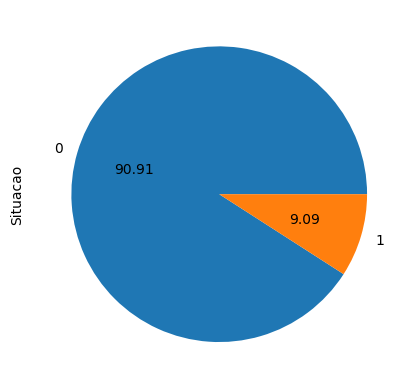

In [8]:
table.Situacao.value_counts().plot.pie(autopct='%.2f');

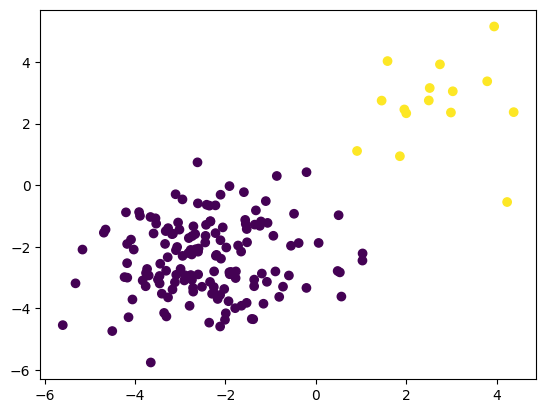

In [9]:
import matplotlib.pyplot as plt #viasualizando a distribuição dos dados ainda desbalanceados
fig, ax = plt.subplots()

ax.scatter(table.SaldoConta, table.SaldoInvestimento,c=table.Situacao)


plt.show()

In [10]:
from imblearn.under_sampling import RandomUnderSampler # biblioteca para balancear os dados
#neste caso vou diminuir os dados de um lado

SyntaxError: invalid syntax (_metadata_requests.py, line 1492)

In [ ]:

rus = RandomUnderSampler(random_state=42) #Chamando a função que faz o balanceamneto de forma aleatoria

In [ ]:
X_resampled, Y_resampled = rus.fit_resample(X, Y) #balanceando a base

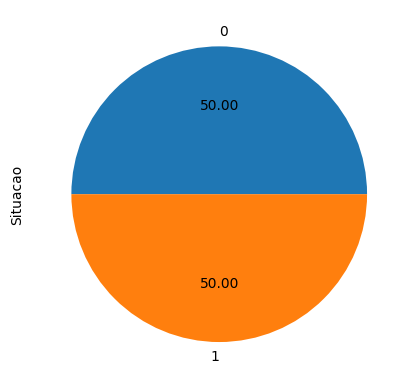

In [ ]:
Y_resampled.value_counts().plot.pie(autopct='%.2f'); # dados balanceados 

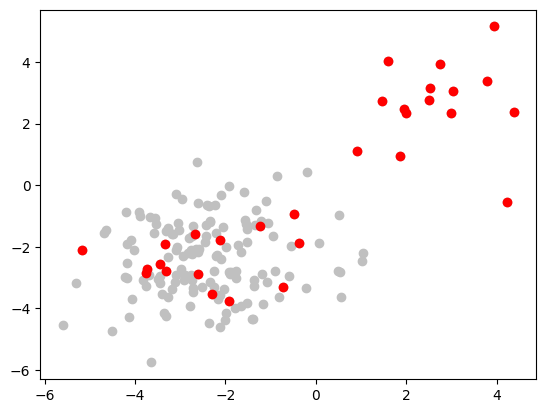

In [ ]:
fig, ax = plt.subplots() #neste plot os pontos em vermelho em destaque sao os dados balenceados e aleatorios

ax.scatter(table.SaldoConta, table.SaldoInvestimento,c='silver')
ax.scatter(X_resampled.SaldoConta,X_resampled.SaldoInvestimento,c='red') 


plt.show()

In [ ]:
# essa biblioteca faz com que a função Random pegue os dados aleatorioa centrais,
# sendo mais assertivo quanto a não perda de dados importantes da base original

from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=42)


In [ ]:
X_res, y_res = cc.fit_resample(X, Y)

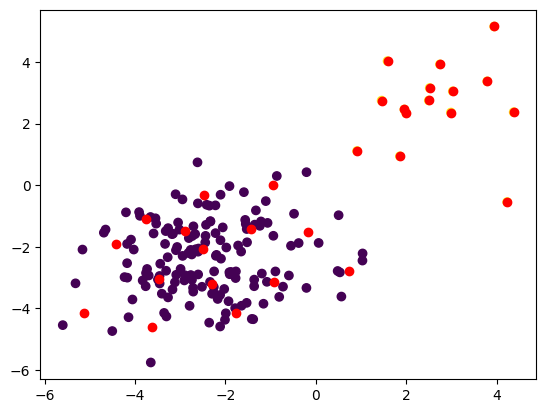

In [ ]:
fig, ax = plt.subplots() #neste plot os pontos em vermelho em destaque sao os dados balenceados, aleatorios e centrais 

ax.scatter(table.SaldoConta, table.SaldoInvestimento,c=table.Situacao)
ax.scatter(X_res.SaldoConta,X_res.SaldoInvestimento,c='red') 


plt.show()

In [ ]:
# esta biblioteca utiliza outra tecnica de pontos mais proximos da outra classe , mantendo apenas os pontos mais proximos da separacao entre as classes
from imblearn.under_sampling import NearMiss
nm = NearMiss()

In [ ]:
X_res, y_res = nm.fit_resample(X, Y)

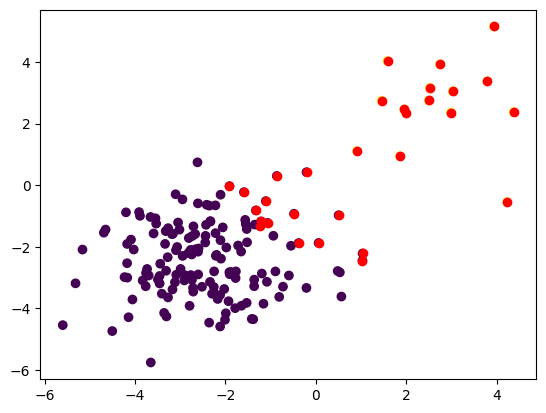

In [ ]:
fig, ax = plt.subplots() #neste plot os pontos em vermelho em destaque sao os dados balenceados,
# aleatorios e mais proximos da linha de separacao da outra classe 

ax.scatter(table.SaldoConta, table.SaldoInvestimento,c=table.Situacao)
ax.scatter(X_res.SaldoConta,X_res.SaldoInvestimento,c='red') 


plt.show()

In [28]:
# O Random Over faz o contrario do Random Under, aqui ele aumenta os dados de forma tb aleatoria da classe minoritaria
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [29]:
X_res, y_res = ros.fit_resample(X, Y)

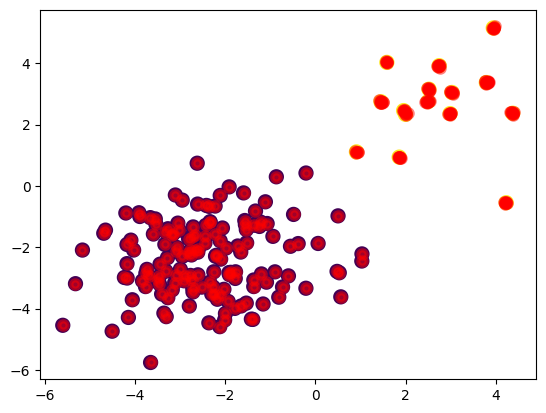

In [37]:
fig, ax = plt.subplots() #neste plot os pontos em vermelho em destaque sao os dados balenceados,
# aleatorios e mais proximos da linha de separacao da outra classe 

ax.scatter(table.SaldoConta, table.SaldoInvestimento,c=table.Situacao, linewidths=5)
ax.scatter(X_res.SaldoConta,X_res.SaldoInvestimento,c='red', linewidths=3, alpha=0.5) 


plt.show()

In [31]:
y_res.value_counts()

0    150
1    150
Name: Situacao, dtype: int64

In [32]:
X_res

,SaldoConta,SaldoInvestimento
0,-1.365390,-3.280278
1,-1.992492,-4.158429
2,-3.910816,-0.874096
3,-2.745822,-2.250098
4,-1.352205,-1.280924
...,...,...
295,1.999168,2.333924
296,4.375921,2.370152
297,4.231165,-0.547074
298,4.375921,2.370152


In [45]:
# Atentando para como este modelo funciona com o Over Sampler , ele mltiplica de forma aleatoria cada uma das linhas, mas com isso 
# pode - se ter um problema de que o modelo entenda que alguma linha especifica por ter mais quantidades do que outras o modelo enviese por conta deste dado mais replicado
# pra isso , existe uma função 'Shrinkage' ele adiciona decimais a cada dado para que o Randam Over nao multiplique dados iguais e sim dados com uma diferença ínfima

ros = RandomOverSampler(random_state=42, shrinkage=0.05) #vc determina o decimal que mais se adequa ao seu negocio
X_res, y_res = ros.fit_resample(X, Y)

In [46]:
X_res

,SaldoConta,SaldoInvestimento
0,-1.365390,-3.280278
1,-1.992492,-4.158429
2,-3.910816,-0.874096
3,-2.745822,-2.250098
4,-1.352205,-1.280924
...,...,...
295,2.003132,2.364328
296,4.392712,2.338609
297,4.212219,-0.524631
298,4.389821,2.306163


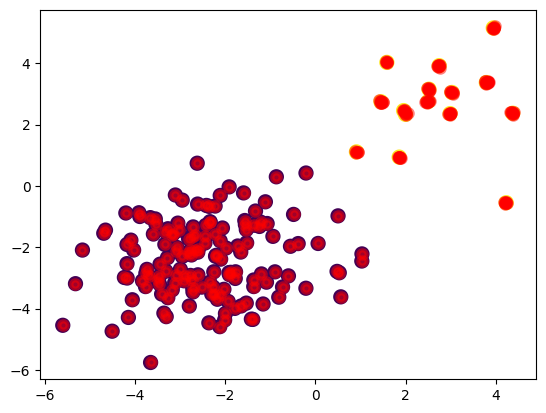

In [47]:
fig, ax = plt.subplots() #neste plot os pontos suavizaram se distanciaram do dado original de acordo com o shrincage aplicado com ponto decimal de 0.05

ax.scatter(table.SaldoConta, table.SaldoInvestimento,c=table.Situacao, linewidths=5)
ax.scatter(X_res.SaldoConta,X_res.SaldoInvestimento,c='red', linewidths=3, alpha=0.5) 


plt.show()

In [48]:
# outra forma de fazer o Over Sampler é com o SMOTE e o ADASYN que utiliza o KNN como tecnica de vizinhos proximos, ele cria o dado com base 
# na proximidade com dado real 
from imblearn.over_sampling import SMOTE, ADASYN
sn = SMOTE(random_state=42)

In [50]:
X_res,y_res = sn.fit_resample(X,Y)

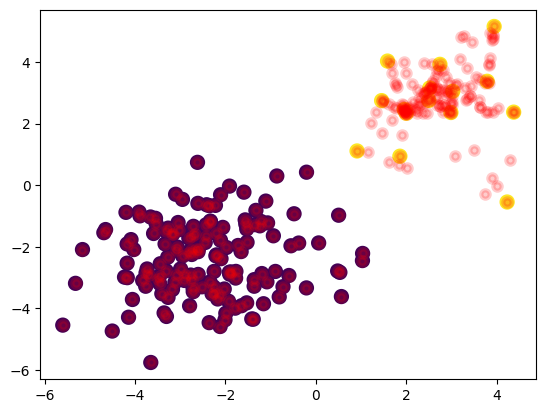

In [52]:
fig, ax = plt.subplots() #neste plot pode se observar que entre os pontos em amarelo o smote cria um novo dado com base nesta proximidade

ax.scatter(table.SaldoConta, table.SaldoInvestimento,c=table.Situacao, linewidths=5)
ax.scatter(X_res.SaldoConta,X_res.SaldoInvestimento,c='red', linewidths=3, alpha=0.2) 


plt.show()

In [53]:
ada = ADASYN(random_state=42)
X_res,y_res = ada.fit_resample(X,Y)

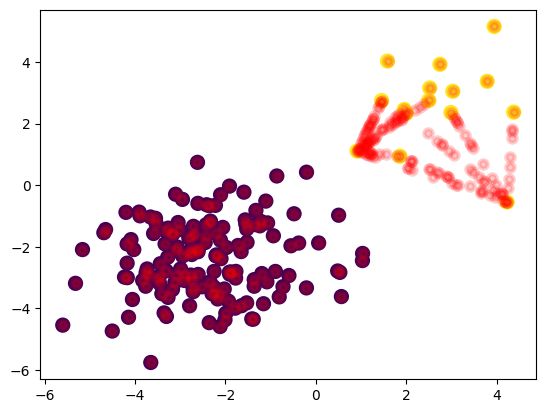

In [54]:
fig, ax = plt.subplots() #neste plot pode se observar que O adasyn SE CONCENTRA EM pegar os pontos mais proximos da classe majoritaria

ax.scatter(table.SaldoConta, table.SaldoInvestimento,c=table.Situacao, linewidths=5)
ax.scatter(X_res.SaldoConta,X_res.SaldoInvestimento,c='red', linewidths=3, alpha=0.2) 


plt.show()